File name: DBSCAN_feature_clustering

Description: this file contains the code for DBSCAN clustering the using the botanicals and then compounds within each recipes.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from statistics import mean
import json

In [2]:
df = pd.read_excel("../../data/refinded_Gin(Nov2022).xlsm")
#aling column titles
df.columns = df.iloc[7]
#delete null rows 
df.drop([0,1,2,3,4,5,6,7,560,561,562], inplace=True)
#drop useless columns
with open("../../data/removed_coloumns.txt") as f:
    drop_these = f.read().splitlines()
df.drop(drop_these, axis=1, inplace=True)

#drop juniper as this is a required in all gins 
df_new = df.drop(labels=["Juniper"], axis=1)

In [3]:
botanicals = df_new.iloc[:,25:277]

compounds = df_new.iloc[:,277:]
#normalise compounds 
# Min-Max Normalization (scaling between 0 and 1)
# for column in compounds.columns:
#     compounds[column] = (compounds[column] - compounds[column].min()) / (compounds[column].max() - compounds[column].min())
botanicals.head()

7,Rosewater,Honey,Lemon Myrtle,Herb-Robert,Camomile,Rose,Jasmine,Passion Flower,Acacia Flower,Elderflower,...,Tangerine,Black Lemon,Buddha's Hand,Calamansi,Jaffa Cakes,Treacle,Bee Pollen,Collagen,Angostura Bitters,Balsamic Vinegar
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
EPS = np.arange(0.1,2,0.1)
scores = {}

silhouette_scores = []
davies_bouldin_scores = []
for eps in EPS:
    #print(index,"  ----  ",k)
    dbscan = DBSCAN(eps=eps).fit(botanicals)
    #inertia.append(dbscan.inertia_)
    #print(kmeans.inertia_)
    score = silhouette_score(botanicals, dbscan.labels_)
    db_score = davies_bouldin_score(botanicals, dbscan.labels_)
    silhouette_scores.append(score)     
    davies_bouldin_scores.append(db_score)
        
scores["botanicals"] = {
    "silhouette_scores": silhouette_scores,
    "davies_bouldin_scores": davies_bouldin_scores
}    

In [16]:
EPS = np.arange(1000,10000,100)

silhouette_scores = []  
davies_bouldin_scores = []
for eps in EPS:
    #print(index,"  ----  ",k)
    dbscan = DBSCAN(eps=eps).fit(compounds)
    #inertia.append(dbscan.inertia_)
    #print(kmeans.inertia_)
    score = silhouette_score(botanicals, dbscan.labels_)
    db_score = davies_bouldin_score(botanicals, dbscan.labels_)
    silhouette_scores.append(score)
    davies_bouldin_scores.append(db_score)
        
scores["compounds"] = {
    "silhouette_scores": silhouette_scores,
    "davies_bouldin_scores": davies_bouldin_scores
}    

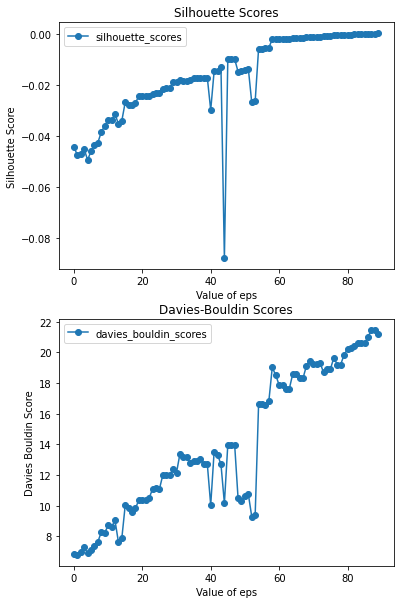

In [27]:
with open('../../data/json/dbscan_features.json', 'w') as f:
    json.dump(scores, f)  

fig, ax = plt.subplots(2, 1, figsize=(6, 10))

#for values in scores:
ax[0].plot(np.arange(90), scores["compounds"]["silhouette_scores"], label=f"silhouette_scores", marker='o')
ax[1].plot(np.arange(90), scores["compounds"]["davies_bouldin_scores"], label=f"davies_bouldin_scores", marker='o')
    
ax[0].set_title("Silhouette Scores")
ax[1].set_title("Davies-Bouldin Scores")
ax[0].set_xlabel("Value of eps")
ax[1].set_xlabel("Value of eps")
ax[0].set_ylabel("Silhouette Score")
ax[1].set_ylabel("Davies Bouldin Score")
ax[0].legend()
ax[1].legend()


plt.show()

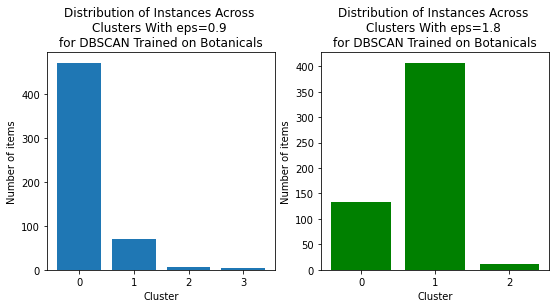

In [ ]:
dbscan = DBSCAN(eps=0.9).fit(botanicals)
labels1 = dbscan.labels_
category_dist1 = np.unique(labels1, return_counts=True)
dbscan = DBSCAN(eps=1.8).fit(botanicals)
labels2 = dbscan.labels_
category_dist2 = np.unique(labels2, return_counts=True)

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].bar(category_dist1[0], category_dist1[1])
ax[0].set_xlabel("Cluster")
ax[0].set_xticks(category_dist1[0], np.arange(len(category_dist1[0])))
ax[0].set_ylabel("Number of items")
ax[0].set_title("Distribution of Instances Across \nClusters With eps=0.9 \nfor DBSCAN Trained on Botanicals")
ax[1].bar(category_dist2[0], category_dist2[1], color='green')
ax[1].set_xlabel("Cluster")
ax[1].set_xticks(category_dist2[0],np.arange(len(category_dist2[0])))
ax[1].set_ylabel("Number of items")
ax[1].set_title("Distribution of Instances Across \nClusters With eps=1.8 \nfor DBSCAN Trained on Botanicals")

plt.show()

In [ ]:
tsne = TSNE(n_components=2, random_state=150)
tsne_results = tsne.fit_transform(botanicals)
x = tsne_results[:, 0]
y = tsne_results[:, 1]


Text(0, 0.5, 't-SNE Component 2')

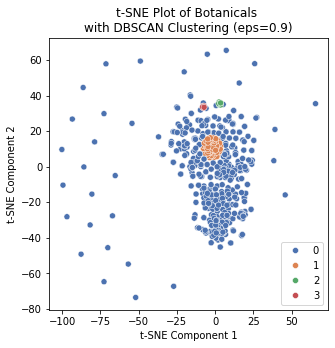

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x, y=y, hue=labels1+1, palette="deep", legend="full")
plt.title("t-SNE Plot of Botanicals \nwith DBSCAN Clustering (eps=0.9)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")


Text(0.5, 0, 't-SNE Component 1')

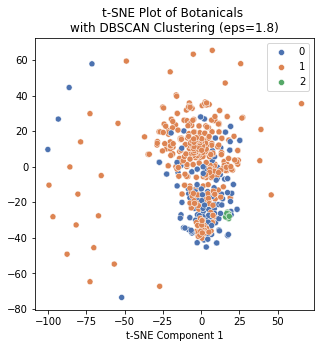

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x, y=y, hue=labels2+1, palette="deep", legend="full")
plt.title("t-SNE Plot of Botanicals \nwith DBSCAN Clustering (eps=1.8)")
plt.xlabel("t-SNE Component 1")         

In [ ]:
dbscan = DBSCAN(eps=1.5).fit(botanicals)
labels3 = dbscan.labels_
category_dist3 = np.unique(labels3, return_counts=True)

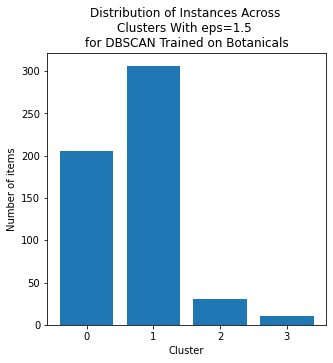

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(category_dist3[0], category_dist3[1])
plt.xlabel("Cluster")
plt.xticks(category_dist3[0], np.arange(len(category_dist3[0])))
plt.ylabel("Number of items")
plt.title("Distribution of Instances Across \nClusters With eps=1.5 \nfor DBSCAN Trained on Botanicals")
plt.show()  

Text(0, 0.5, 't-SNE Component 2')

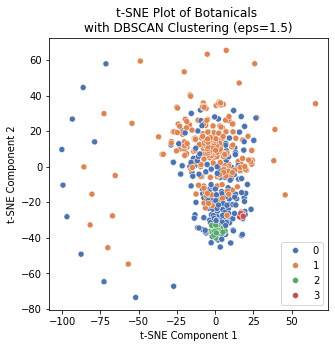

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x, y=y, hue=labels3+1, palette="deep", legend="full")
plt.title("t-SNE Plot of Botanicals \nwith DBSCAN Clustering (eps=1.5)")
plt.xlabel("t-SNE Component 1")     
plt.ylabel("t-SNE Component 2")

In [38]:
dbscan = DBSCAN(eps=6000).fit(compounds)
labels4 = dbscan.labels_
category_dist4 = np.unique(labels4, return_counts=True)

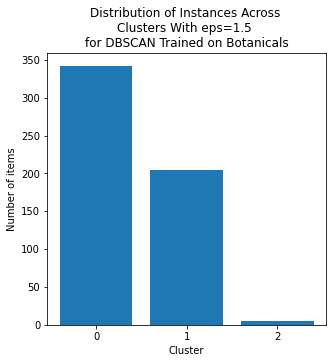

In [39]:
plt.figure(figsize=(5, 5))
plt.bar(category_dist4[0], category_dist4[1])
plt.xlabel("Cluster")
plt.xticks(category_dist4[0], np.arange(len(category_dist4[0])))
plt.ylabel("Number of items")
plt.title("Distribution of Instances Across \nClusters With eps=1.5 \nfor DBSCAN Trained on Botanicals")
plt.show()  

In [40]:
tsne = TSNE(n_components=2, random_state=150)
tsne_results = tsne.fit_transform(compounds)
x = tsne_results[:, 0]
y = tsne_results[:, 1]

Text(0, 0.5, 't-SNE Component 2')

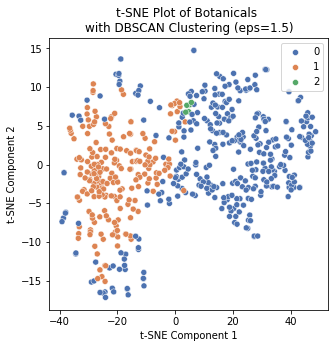

In [41]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x, y=y, hue=labels4+1, palette="deep", legend="full")
plt.title("t-SNE Plot of Botanicals \nwith DBSCAN Clustering (eps=1.5)")
plt.xlabel("t-SNE Component 1")     
plt.ylabel("t-SNE Component 2")